In [5]:
using ITensors
import TensorCrossInterpolation as TCI
using TCIITensorConversion
using QuanticsGrids
using Plots
include("../../src/functions.jl")

packages uploaded
------------------------------


functions uploaded
------------------------------


**Using the TCI to find the TN form**

In [127]:


L1 = 30 #for n
L2 = 20 #for p
L3 = 10 #for k 

L = Int(L1+ L2+ L3)
β = 100
k_max = 3 # momentum of the polarization
p_max = 2000
k_min = 0
T = 1/β
m = 0 #The 


epsilon(p:: Real) = p^2 - μ
μ = 1


G(iω, p) = 1/(iω - epsilon(p))

function f(v)
    x = b2c(v[1:L1])
    x1 = b2c(v[L1+1:L1+L2])
    x2 = b2c(v[L1+L2+1:L1+L2+L3])
    n = 2^(L1 + 1) * (x - 1/2) 
    iω = (2*n + 1) * π * T *im
    p = p_max * (x1-1/2)
    k = k_max * (x2)  + k_min
    return G(iω, p+k)
end

localdims = fill(2, L)  # Fill the tensor with dimensions of size 2

tolerance = 1e-18

tci, ranks, errors = TCI.crossinterpolate2(ComplexF64, f, localdims; tolerance=tolerance, maxbonddim = 500)

mps_shifted = MPS(tci)
println()
#=
println("mps_shifted calculation is done")

h5open("mps_shifted_1D_data.h5", "w") do file
    write(file, "MPS", mps_shifted)
end
println("file saved successfully")
=#   

 




In [128]:


L1 = 30 #for n
L2 = 20 #for p

L = Int(L1+ L2)
β = 100
k_max = 3 # momentum of the polarization
p_max = 2000
T = 1/β
m = 0 #The 


epsilon(p:: Real) = p^2 - μ
μ = 1


G(iω, p) = 1/(iω - epsilon(p))

function f(v)
    x = b2c(v[1:L1])
    x1 = b2c(v[L1+1:L1+L2])
    n = 2^(L1 + 1) * (x - 1/2) 
    iω = (2*n + 1) * π * T *im
    p = p_max * (x1-1/2)
    return G(iω, p)
end

localdims = fill(2, L)  # Fill the tensor with dimensions of size 2

tolerance = 1e-18

tci, ranks, errors = TCI.crossinterpolate2(ComplexF64, f, localdims; tolerance=tolerance, maxbonddim = 500)

mps = MPS(tci)
println()
#=
println("mps_shifted calculation is done")

h5open("mps_1D_data.h5", "w") do file
    write(file, "MPS", mps)
end
println("file saved successfully")
=#


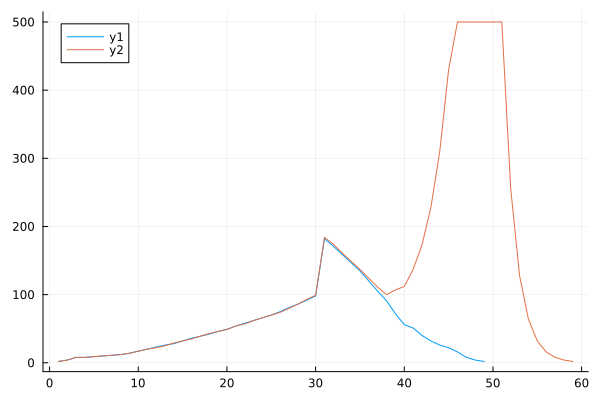

In [129]:
plot([i for i in linkdims(mps)])
plot!([i for i in linkdims(mps_shifted)])

In [130]:
function zipup_MPS_MPS_from_left(Mps1::MPS, Mps2::MPS)
    M1 = copy(Mps1)
    M2 = copy(Mps2)
    n1 = length(M1)
    n2 = length(M2)
    @assert n1 <= n2
    #changing the M1 index
    for j in range(1,n1)
        M1[j] = M1[j]* delta(siteinds(M1)[j],siteinds(M2)[j])
    end
    M = MPS(n2-n1)
    Clinked = M1[1]*M2[1]
    for i in range(2,n1)
        Clinked *= M1[i]
        Clinked *= M2[i]
    end
    M[1] = Clinked * M2[n1+1] 
    for i in range(n1+2,n2)
        M[i-n1] = M2[i]
    end
    return M
end

zipup_MPS_MPS_from_left (generic function with 1 method)

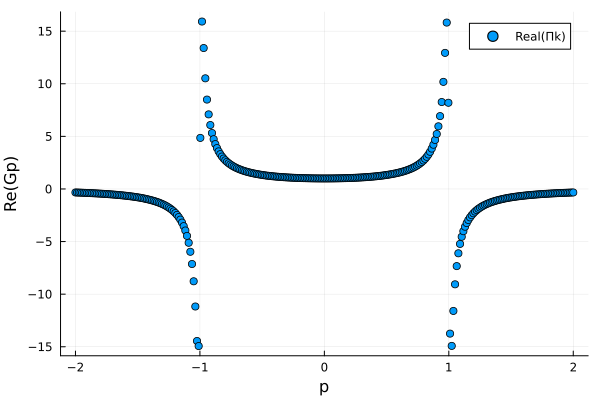

In [134]:
p_range = LinRange(-2,2,300)

Gp = []
for p in p_range
    x = c2b(1/2 ,L1)
    x1 = c2b(p/p_max +1/2, L2)
    s = [x; x1]
    push!(Gp , evaluate(mps,s))
end
# Assuming k_range and Πk are defined
scatter(p_range, real.(Gp), xlabel="p",ylabel="Re(Gp)", label="Real(Πk)")

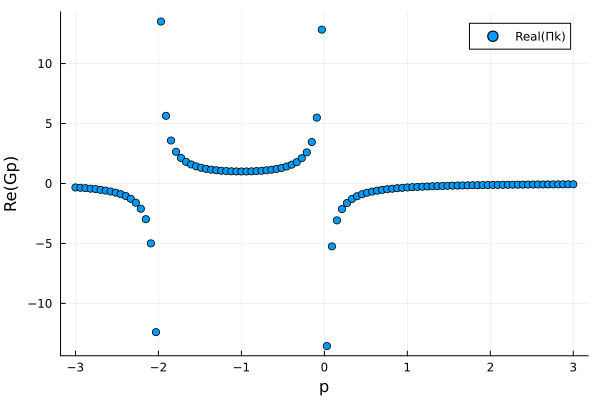

In [136]:
p_range = LinRange(-3,3,100)
k = 1
Gpk = []
for p in p_range
    x = c2b(1/2 ,L1)
    x1 = c2b(p/p_max +1/2, L2)
    x2 = c2b(k/k_max, L3)
    s = [x; x1; x2]
    push!(Gpk , evaluate(mps_shifted,s))
end
# Assuming k_range and Πk are defined
scatter(p_range, real.(Gpk), xlabel="p",ylabel="Re(Gp)", label="Real(Πk)")

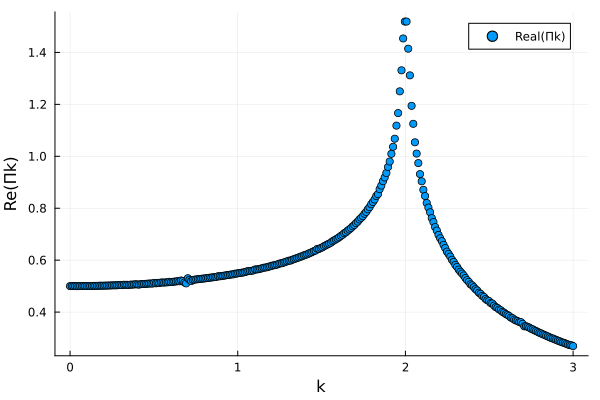

In [138]:
I = zipup_MPS_MPS_from_left(mps, mps_shifted)

k_range = LinRange(0,k_max,300)
Πk = []
for k in k_range
    x3 = c2b(k/k_max - k_min,L3)
    push!(Πk , -p_max* T* (1/2^(L2))*evaluate(I,x3))
end
# Assuming k_range and Πk are defined
scatter(k_range, real.(Πk), xlabel="k",ylabel="Re(Πk)", label="Real(Πk)")

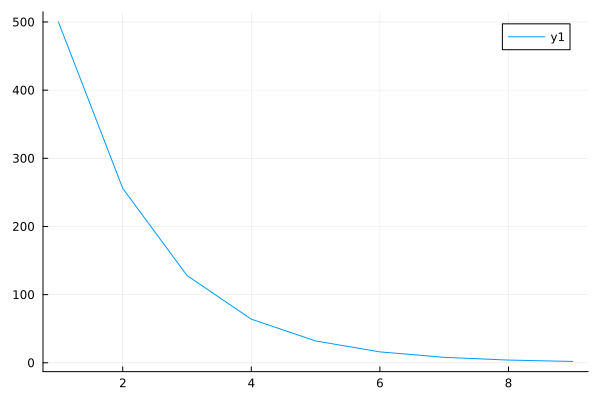

In [139]:
plot([i for i in linkdims(I)])

In [140]:
I2 = copy(I)
truncate!(I2, maxdim = 100)

MPS
[1] ((dim=2|id=78|"n=51"), (dim=2|id=933|"l=51,link"))
[2] ((dim=2|id=945|"n=52"), (dim=4|id=932|"l=52,link"), (dim=2|id=933|"l=51,link"))
[3] ((dim=2|id=401|"n=53"), (dim=8|id=354|"l=53,link"), (dim=4|id=932|"l=52,link"))
[4] ((dim=2|id=808|"n=54"), (dim=16|id=395|"l=54,link"), (dim=8|id=354|"l=53,link"))
[5] ((dim=2|id=50|"n=55"), (dim=32|id=447|"l=55,link"), (dim=16|id=395|"l=54,link"))
[6] ((dim=2|id=148|"n=56"), (dim=16|id=399|"l=56,link"), (dim=32|id=447|"l=55,link"))
[7] ((dim=2|id=612|"n=57"), (dim=8|id=829|"l=57,link"), (dim=16|id=399|"l=56,link"))
[8] ((dim=2|id=323|"n=58"), (dim=4|id=980|"l=58,link"), (dim=8|id=829|"l=57,link"))
[9] ((dim=2|id=38|"n=59"), (dim=2|id=33|"l=59,link"), (dim=4|id=980|"l=58,link"))
[10] ((dim=2|id=811|"n=60"), (dim=2|id=33|"l=59,link"))


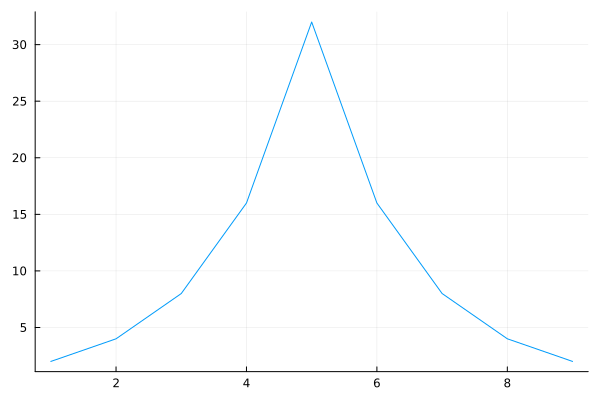

In [141]:
χ = [i for i in linkdims(I2)];
plot(χ,legend=false)

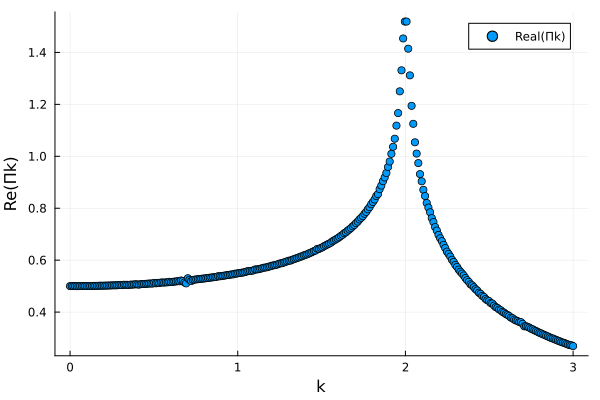

In [142]:
k_range = LinRange(0,k_max,300)
Πk = []
for k in k_range
    x3 = c2b(k/k_max - k_min,L3)
    push!(Πk , -p_max* T* (1/2^(L2))*evaluate(I2,x3))
end
# Assuming k_range and Πk are defined
scatter(k_range, real.(Πk), xlabel="k",ylabel="Re(Πk)", label="Real(Πk)")

**Integrate over the p and sum over n for each k individually**

In [296]:
L = Int(2*26)

L1 = 26 #for n
L2 = 26 #for p
β = 100
k_max = 3 # momentum of the polarization
p_max = 1000
T = 1/β
m = 0 #The 


epsilon(p:: Real) = p^2 - μ
μ = 1

G(iω, k) = 1/(iω - epsilon(k))


Πk = []
χs = []
k_range = LinRange(0,k_max,100)
i = 0 
for k in k_range
    function f(v)
        iν = 2 * m * π * T  * im
        x = b2c(v[1:L1])
        x1 = b2c(v[L1+1:L])
        n = 2^(L1 + 1) * (x - 1/2) 
        iω = (2*n + 1) * π * T *im
        p = 2*p_max * (x1 -1/2)
        return - G(iω,p) * G(iν+iω,k + p)
    end
   
   localdims = fill(2, L)  # Fill the tensor with dimensions of size 2
   
   tolerance = 1e-8
   
   tci, ranks, errors = TCI.crossinterpolate2(ComplexF64, f, localdims; tolerance=tolerance, maxbonddim = 100)
   
   mps = MPS(tci)
   println(i)
   i += 1
   println("-"^20)
   push!(Πk, 2* T *p_max * 2^(L1+1) * integrate(mps))
   χ = [i for i in linkdims(mps)]
   push!(χs,χ)
end 



0
--------------------


1
--------------------


2
--------------------


3
--------------------


4
--------------------


5
--------------------


6
--------------------


7
--------------------


8
--------------------


9
--------------------


10
--------------------


11
--------------------


12
--------------------


13
--------------------


14
--------------------


15
--------------------


16
--------------------


17
--------------------


18
--------------------


19
--------------------


20
--------------------


21
--------------------


22
--------------------


23
--------------------


24
--------------------


25
--------------------


26
--------------------


27
--------------------


28
--------------------


29
--------------------


30
--------------------


31
--------------------


32
--------------------


33
--------------------


34
--------------------


35
--------------------


36
--------------------


37
--------------------


38
--------------------


39
--------------------


40
--------------------


41
--------------------


42
--------------------


43
--------------------


44
--------------------


45
--------------------


46
--------------------


47
--------------------


48
--------------------


49
--------------------


50
--------------------


51
--------------------


52
--------------------


53
--------------------


54
--------------------


55
--------------------


56
--------------------


57
--------------------


58
--------------------


59
--------------------


60
--------------------


61
--------------------


62
--------------------


63
--------------------


64
--------------------


65
--------------------


66
--------------------


67
--------------------


68
--------------------


69
--------------------


70
--------------------


71
--------------------


72
--------------------


73
--------------------


74
--------------------


75
--------------------


76
--------------------


77
--------------------


78
--------------------


79
--------------------


80
--------------------


81
--------------------


82
--------------------


83
--------------------


84
--------------------


85
--------------------


86
--------------------


87
--------------------


88
--------------------


89
--------------------


90
--------------------


91
--------------------


92
--------------------


93
--------------------


94
--------------------


95
--------------------


96
--------------------


97
--------------------


98
--------------------


99
--------------------


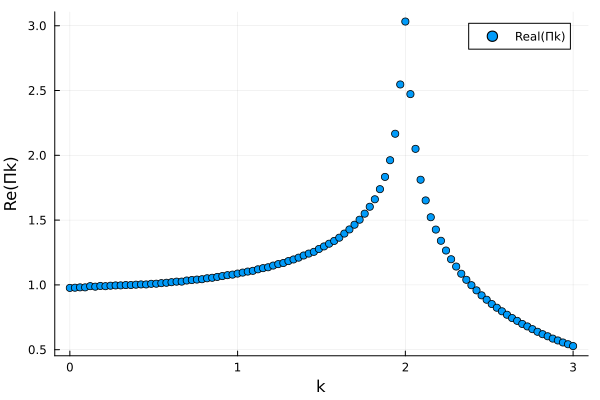

In [297]:
scatter(k_range, real.(Πk), xlabel="k",ylabel="Re(Πk)", label="Real(Πk)")

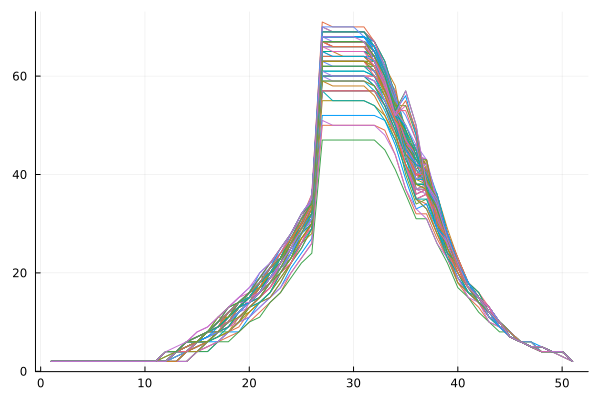

In [298]:
plot(χs,legend=false)